In [1]:
from model import *
from data import *

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/data/spacenet/road/AOI_2_Vegas','PAN-8BIT','PAN-GT',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/dspuser/UNET/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)



Found 989 images belonging to 1 classes.
Epoch 1/5
Found 989 images belonging to 1 classes.
2000/2000 [==============================] - 150s 75ms/step - loss: 0.1369 - accuracy: 0.9482

Epoch 00001: loss improved from inf to 0.13691, saving model to unet_membrane.hdf5
Epoch 2/5
2000/2000 [==============================] - 147s 74ms/step - loss: 0.1097 - accuracy: 0.9562

Epoch 00002: loss improved from 0.13691 to 0.10971, saving model to unet_membrane.hdf5
Epoch 3/5
2000/2000 [==============================] - 148s 74ms/step - loss: 0.1042 - accuracy: 0.9576

Epoch 00003: loss improved from 0.10971 to 0.10420, saving model to unet_membrane.hdf5
Epoch 4/5
2000/2000 [==============================] - 148s 74ms/step - loss: 0.1012 - accuracy: 0.9586

Epoch 00004: loss improved from 0.10420 to 0.10117, saving model to unet_membrane.hdf5
Epoch 5/5
2000/2000 [==============================] - 148s 74ms/step - loss: 0.0967 - accuracy: 0.9595

Epoch 00005: loss improved from 0.10117 to 0.096

### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [5]:
from PIL import Image
import numpy as np
from skimage import transform

In [3]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

C:\Users\xuhaozhi\Documents\Study\unet\model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `

 1/30 [>.............................] - ETA: 4s

C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


30/30 [==============================] - 1s 47ms/step


C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [46]:
model = unet()
model.load_weights("unet_membrane.hdf5")
np_image = Image.open('/data/spacenet/road/AOI_3_Paris_Roads_Test_Public/PAN-PNG/PAN_AOI_3_Paris_img171.png')
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image,(256,256,1))
np_image = np.expand_dims(np_image, axis=0)


In [47]:
maskArr = model.predict(np_image)

In [48]:
maskArr = maskArr.reshape(256,256)

In [49]:
maskArrThresh = np.zeros((maskArr.shape[0], maskArr.shape[1], 4))
for row in range(0, maskArr.shape[0]):
    for col in range(0, maskArr.shape[1]):
        #if maskarr[row, col] < 0.: 
        maskArrThresh[row, col, 0] = 50 
        maskArrThresh[row, col, 1] = 255 
        maskArrThresh[row, col, 2] = 0 
        maskArrThresh[row, col, 3] = int(maskArr[row, col] * 255)
        #else: #maskArrThresh[row, col, 0:3] = 255 # maskArrThresh[row, col, 3] = 0

In [50]:
maskArrThresh = maskArrThresh.astype("uint8")

In [51]:
maskImg = Image.fromarray(maskArrThresh, 'RGBA')

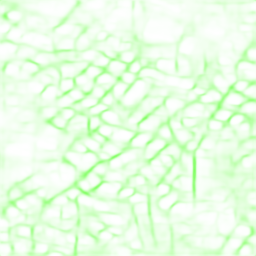

In [52]:
maskImg

In [53]:
PANImg = Image.open('/data/spacenet/road/AOI_3_Paris_Roads_Test_Public/PAN-PNG/PAN_AOI_3_Paris_img171.png')
PANImgT = PANImg.convert('RGBA')

In [54]:
PANDim = (PANImgT.width, PANImgT.height) 
maskImgResize = maskImg.resize(PANDim)

In [55]:
comp = Image.alpha_composite(PANImgT,maskImgResize)

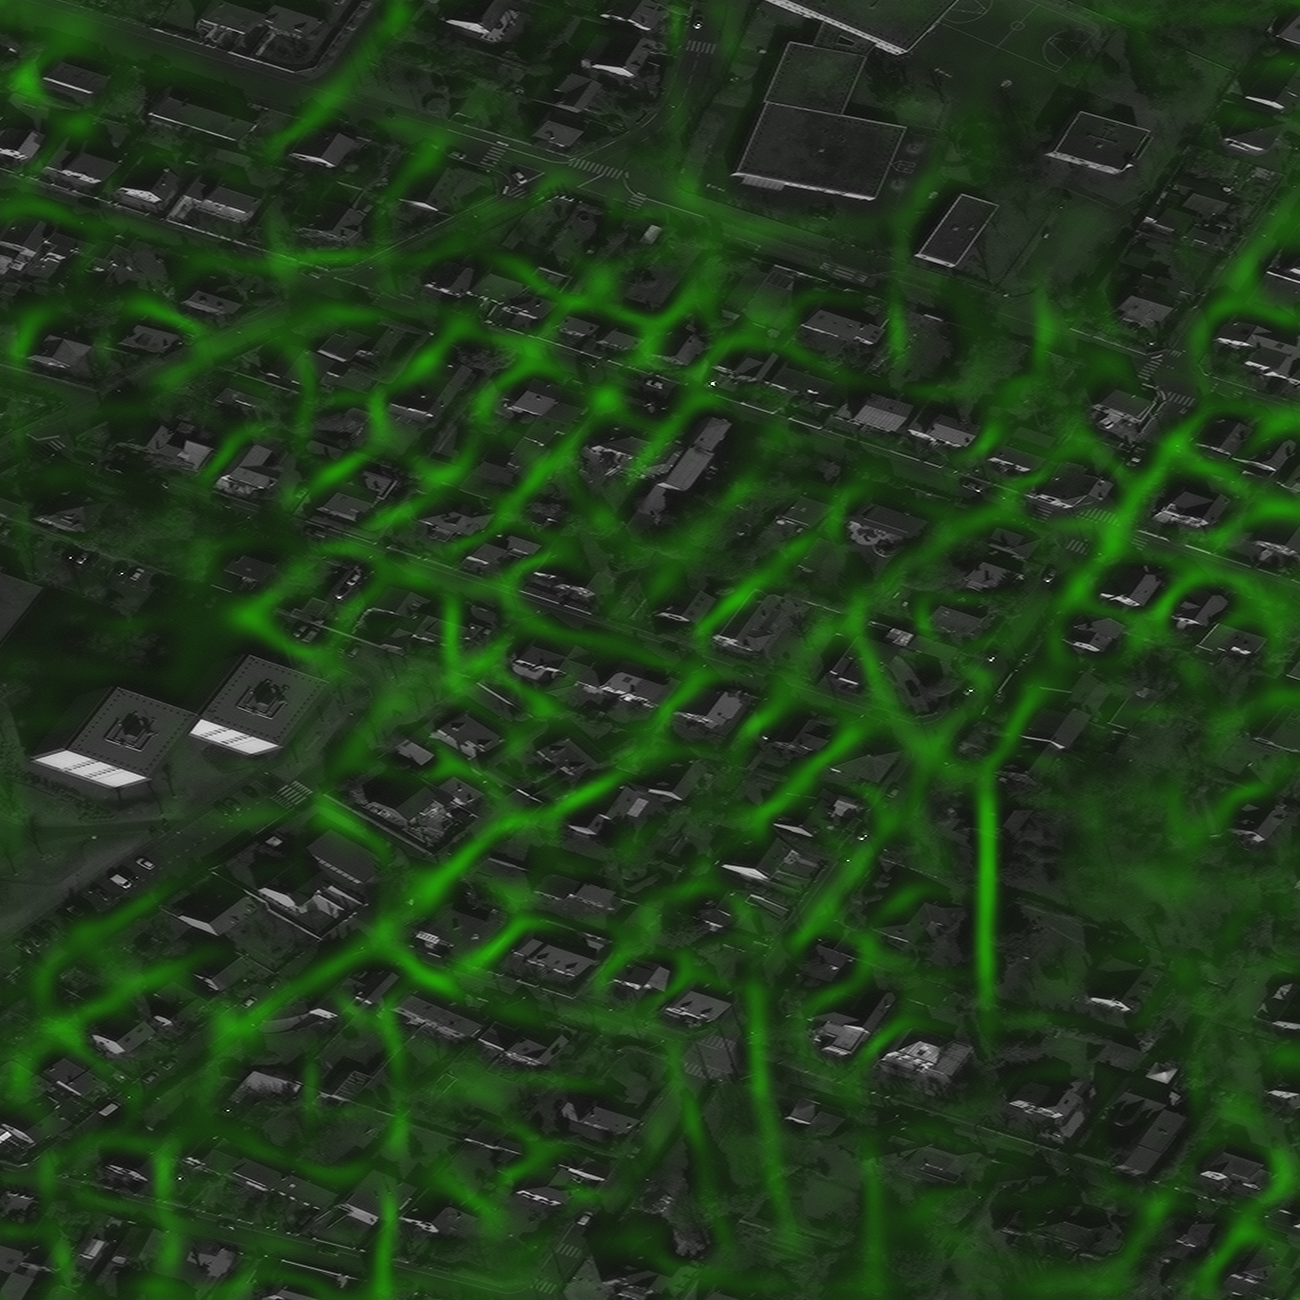

In [56]:
comp

In [45]:
comp.save("Test1.png")